<a href="https://colab.research.google.com/github/Vicente-Figueroa/IBM-MachineLearning/blob/main/Machine_learnigng-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Required by coursera

Sections required in your report:

    Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.

    Brief description of the data set you chose and a summary of its attributes.

    Brief summary of data exploration and actions taken for data cleaning and feature engineering.

    Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

    A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

    Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

    Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

### Main objetives
The main objective of this work is to analyze and find patterns in the data that guide us in understanding linear regression models and the creation process.

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

### About the data
The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them.

Reference : https://www.kaggle.com/datasets/sohier/calcofi

In [ ]:
# read the csv file and print the content
bottle = pd.read_csv('bottle.csv', low_memory=False, nrows=500)
bottle

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,496,063.3 058.0,19-4903CR-HY-065-1030-06330580-0700A-7,700,4.90,34.269,NaN,27.114,NaN,...,NaN,706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,16,497,063.3 058.0,19-4903CR-HY-065-1030-06330580-0792A-3,792,4.50,34.310,NaN,27.191,NaN,...,NaN,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,16,498,063.3 058.0,19-4903CR-HY-065-1030-06330580-0800A-7,800,4.48,34.311,NaN,27.194,NaN,...,NaN,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,16,499,063.3 058.0,19-4903CR-HY-065-1030-06330580-0900A-7,900,4.21,34.319,NaN,27.230,NaN,...,NaN,908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning and feature enginering

In [ ]:
bottle.isnull().sum()

Cst_Cnt                  0
Btl_Cnt                  0
Sta_ID                   0
Depth_ID                 0
Depthm                   0
                      ... 
TA1                    500
TA2                    500
pH2                    500
pH1                    500
DIC Quality Comment    500
Length: 74, dtype: int64

In [ ]:
# drop the columns with more than 50 nan values
bottle.dropna(axis='columns', thresh=50, inplace=True)
bottle.isnull().sum()

Cst_Cnt        0
Btl_Cnt        0
Sta_ID         0
Depth_ID       0
Depthm         0
T_degC         1
Salnty         6
STheta         7
RecInd         0
T_prec         1
S_prec         6
P_qual         0
O_qual         0
O2Satq         0
Chlqua         0
Phaqua         0
PO4q           0
SiO3qu         0
NO2q           0
NO3q           0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         1
R_POTEMP       5
R_SALINITY     6
R_SIGMA       14
R_SVA         14
R_DYNHT        0
R_PRES         0
dtype: int64

In [ ]:
# making a correlation matrix to see posible columns to the regression
corr = bottle.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,P_qual,O_qual,O2Satq,Chlqua,Phaqua,PO4q,SiO3qu,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.997963,0.055923,0.008057,0.037059,0.013342,0.012361,0.003874,0.011349,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.055923,0.008057,0.008632,0.037059,0.013879,-0.011380,0.067807,0.055826
Btl_Cnt,0.997963,1.000000,0.113245,-0.052039,0.096171,0.074070,0.025816,0.021974,0.024344,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.113245,-0.052039,-0.051266,0.096171,0.074369,-0.071687,0.127645,0.113133
Depthm,0.055923,0.113245,1.000000,-0.910867,0.835648,0.873095,0.180511,0.160221,0.171479,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,-0.910867,-0.912426,0.835648,0.873018,-0.867638,0.978625,0.999999
T_degC,0.008057,-0.052039,-0.910867,1.000000,-0.922900,-0.977945,-0.190503,-0.202297,-0.181028,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.910867,1.000000,0.999994,-0.922900,-0.978223,0.977220,-0.938292,-0.910680
Salnty,0.037059,0.096171,0.835648,-0.922900,1.000000,0.981388,0.184365,0.221749,0.184365,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.835648,-0.922900,-0.924065,1.000000,0.981839,-0.981928,0.882951,0.835408
STheta,0.013342,0.074070,0.873095,-0.977945,0.981388,1.000000,0.186720,0.222646,0.186720,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.873095,-0.977945,-0.978121,0.981388,0.999994,-0.999908,0.916219,0.872863
RecInd,0.012361,0.025816,0.180511,-0.190503,0.184365,0.186720,1.000000,0.222236,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.180511,-0.190503,-0.186189,0.184365,0.186230,-0.185427,0.198564,0.180425
T_prec,0.003874,0.021974,0.160221,-0.202297,0.221749,0.222646,0.222236,1.000000,0.226428,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.160221,-0.202297,-0.192795,0.221749,0.215970,-0.214782,0.206027,0.159973
S_prec,0.011349,0.024344,0.171479,-0.181028,0.184365,0.186720,1.000000,0.226428,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.171479,-0.181028,-0.176417,0.184365,0.186230,-0.185427,0.188433,0.171391
P_qual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
# Extract 4 columns 'T_degC','Salnty' for better explanation
bottle_df = bottle[['T_degC','Salnty','R_SVA', 'R_Depth']]
bottle_df.columns = ['Temperature', 'Salinity','R_SVA','R_Depth']

In [ ]:
# Saw a correlation matrix to verify the relation between the columns
corr = bottle_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature,Salinity,R_SVA,R_Depth
Temperature,1.000000,-0.922900,0.977220,-0.910867
Salinity,-0.922900,1.000000,-0.981928,0.835648
R_SVA,0.977220,-0.981928,1.000000,-0.867638
R_Depth,-0.910867,0.835648,-0.867638,1.000000


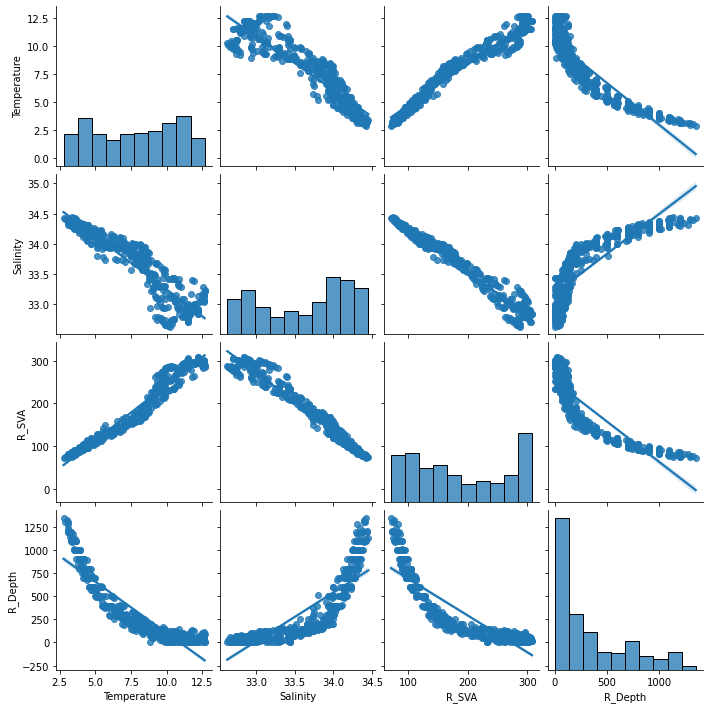

In [ ]:
# make a pairplot to see the relationship
sns.pairplot(bottle_df, kind="reg")

In [ ]:
# cleaning the null values
bottle_df.isnull().sum()

Temperature     1
Salinity        6
R_SVA          14
R_Depth         0
dtype: int64

In [ ]:
bottle_df.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## Linear regression part

In [ ]:
# import the libraries for this section
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [ ]:
# making the variables X, y and the cv folds
X = bottle_df[['Salinity','R_SVA','R_Depth']]
y = bottle_df[['Temperature']]
folds = 3

In [ ]:
#scale the values
columns = X.columns
X[columns] = MinMaxScaler().fit_transform(X[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
# making the first lineal regression and output the scores
LR = LinearRegression()
scores = cross_val_score(LR, X, y, cv=folds)

In [ ]:
print(f'The mean of the scores is : {np.mean(scores)}')

The mean of the scores is : 0.9456793446403347


### Adding polinomial features

In [ ]:
# making a for loop to see the best r2 score
for a in range(1,10):
    poly = PolynomialFeatures(a)
    df_poly = poly.fit_transform(X)
    scores = cross_val_score(LR, df_poly, y, cv=folds, scoring='r2')
    print(f'The mean of the scores is : {np.mean(scores)} for polynomial in : {a}')

The mean of the scores is : 0.9456793446403348 for polynomial in : 1
The mean of the scores is : 0.8858385416353842 for polynomial in : 2
The mean of the scores is : -5.618607086264333 for polynomial in : 3
The mean of the scores is : -19.43969116820325 for polynomial in : 4
The mean of the scores is : -1268.33907801594 for polynomial in : 5
The mean of the scores is : -86665.83524733946 for polynomial in : 6
The mean of the scores is : -62184125.81089759 for polynomial in : 7
The mean of the scores is : -28018786844.873165 for polynomial in : 8
The mean of the scores is : -5221274094012.458 for polynomial in : 9


In [ ]:
## adding ridge
from sklearn.linear_model import Ridge
alphas = [0.001, 0.01, 0.1, 0.9, 1, 10, 50]
for a in alphas:
    LR2 = Ridge(alpha=a)
    scores = cross_val_score(LR2, X, y, cv=folds, scoring='r2')
    np.around(scores, 2)
    print(f'The mean of the scores is : {np.mean(scores)} for alpha in : {a}')

The mean of the scores is : 0.9457464719127296 for alpha in : 0.001
The mean of the scores is : 0.946308610720541 for alpha in : 0.01
The mean of the scores is : 0.9490217032228809 for alpha in : 0.1
The mean of the scores is : 0.9381691442747883 for alpha in : 0.9
The mean of the scores is : 0.9369658660408359 for alpha in : 1
The mean of the scores is : 0.9117518894377806 for alpha in : 10
The mean of the scores is : 0.7993223506852538 for alpha in : 50


In [ ]:
from sklearn import linear_model

alphas = [0.001, 0.01, 0.1, 0.9, 1, 10, 50]
for a in alphas:
    LR3 = linear_model.Lasso(alpha=a)
    scores = cross_val_score(LR3, X, y, cv=folds, scoring='r2')
    np.around(scores, 2)
    print(f'The mean of the scores is : {np.mean(scores)} for alpha in : {a}')

The mean of the scores is : 0.9455310220718417 for alpha in : 0.001
The mean of the scores is : 0.9466525757619872 for alpha in : 0.01
The mean of the scores is : 0.9316203207237496 for alpha in : 0.1
The mean of the scores is : 0.06824820452618367 for alpha in : 0.9
The mean of the scores is : -0.012504575901135961 for alpha in : 1
The mean of the scores is : -0.035163565349731085 for alpha in : 10
The mean of the scores is : -0.035163565349731085 for alpha in : 50


### A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

Response:

When evaluating the performance of r2 in all the trained models, one of the highest average score in the cross-validation is the linear regression loop with polynomial at degree 10 and alpha at 0.1.

However, we see how in the ridge and lasso regressions it was possible to readjust the model with the added weights to increase performance after adding polynomials, being a good option against overfitting.

With this in mind, based on better explainability at the risk of accuracy, I choose the first simple linear regression model as it should not undergo any transformation.

### Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

In [ ]:
# Through the first model, we can observe the coefficients of the regression, which gives
LR = LinearRegression()
LR.fit(X,y)
print(LR.coef_)
print(X.columns)

[[ 3.96428218  9.95769778 -3.22903977]]
Index(['Salinity', 'R_SVA', 'R_Depth'], dtype='object')


The explanation here is that each value within the coefficient list means the weight that is added to the final value through a change in input.
These weights are directly related to their respective columns since we work with the first linear regression which has not undergone any polynomial transformation.

 ### Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

- For the following steps I would try to do more feature engineering to normalize the distribution of the variables, I would also apply more columns as necessary to increase or experiment with the r2 score

- In addition to the above, I would create more tests with different metrics to see the performance of different configurations of the model.